In [1]:
#Branch_MV
import requests
import pandas as pd
import numpy as np
import datetime
import os
import zipfile

In [2]:
#List of countries and regions are here: https://unstats.un.org/unsd/methodology/m49/overview/ but website using
#javascript and not providing link for csv file directly
#Workaround:
#Using a github page to download a csv file
url = "https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/raw/master/all/all.csv"
filename = "countries.csv"

response = requests.get(url)

if response.status_code == 200:
    with open(filename, "wb") as file:
        file.write(response.content)
    print("CSV file downloaded successfully.")
else:
    print("Failed to download the CSV file.")

CSV file downloaded successfully.


In [3]:
df_countries=pd.read_csv("countries.csv")

In [4]:
#To find a file of your interest: https://data.worldbank.org/indicator
#Clicking on a subset allows to get address to download csv-file

#These are addresses to obtain the data for GDP per capita, life expectancy and literacy rate
url_list=["https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.PP.CD?downloadformat=csv", \
          "https://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=csv",\
            "https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.ZS?downloadformat=csv"]

In [5]:
#Also, giving names for the data to be obtained
data_list=["gdp_per_capita", "life_expectancy", "literacy"]

In [6]:
#First, making folder to download the data from web, names based on data_list
for d in data_list:
    if not os.path.exists(d):
        os.makedirs(d)
    if not os.path.exists(d+"_unpacked"):
        os.makedirs(d+"_unpacked")

In [7]:
#Here one by one, I dowload the data and put into a right folder
for d, u in zip(data_list, url_list):
    response = requests.get(u)
    if response.status_code == 200:
        with open(d+"/"+d+".zip", "wb") as file:
            file.write(response.content)
        print("Zip file downloaded successfully!")
    else:
        print("Failed to retrieve the zip file.")

Zip file downloaded successfully!
Zip file downloaded successfully!
Zip file downloaded successfully!


In [8]:
#Unpacking the data as well
for d in data_list:
    zip_file_path=d+"/"+d+".zip"
    destination_folder=d+"_unpacked"
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
    print("Extraction completed!")


Extraction completed!
Extraction completed!
Extraction completed!


In [9]:
#To remove excess rows in the csv file, an additional method:
def copy_file(source_file, destination_file):
    with open(source_file, 'r') as source:
        with open(destination_file, 'w') as destination:
            counter=0
            for line in source:
                if(counter>3):
                    destination.write(line)
                counter=counter+1

In [10]:
#Removing extra rows from the csv file:

for d in data_list:
    file_list=os.listdir(d+"_unpacked")
    file_list.sort()
    source_file=d+"_unpacked/"+file_list[0]
    destination_file=d+".csv"
    copy_file(source_file, destination_file)

In [11]:
#Using pandas, going to create the dataframe list:
df_list=[]
for d in data_list:
    temp_df=pd.read_csv(d+".csv")
    df_list.append(temp_df)

In [12]:
#The last column is empty, must be removed
df_list[0].head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36846.848285,37343.912963,37583.840323,38865.188195,41679.238190,42501.641554,34971.009913,42698.359872,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3470.550675,3498.125396,3591.099809,3635.564622,3724.868177,3777.972368,3621.058106,3839.470058,NaN,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842,NaN,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4143.177054,4075.994459,3998.951876,4045.303263,4160.540965,4264.731035,4174.504565,4409.450961,NaN,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8123.048065,7274.090475,7027.146634,7216.061373,7042.923829,6881.076241,6362.636076,6491.125578,NaN,NaN


In [13]:
#Running the deletion
for n in range(len(df_list)):
    df_list[n]=df_list[n][df_list[n].columns[:-1]]

In [14]:
#Checking
df_list[0].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36932.184164,36846.848285,37343.912963,37583.840323,38865.188195,41679.238190,42501.641554,34971.009913,42698.359872,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3333.520911,3470.550675,3498.125396,3591.099809,3635.564622,3724.868177,3777.972368,3621.058106,3839.470058,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2062.059176,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3950.948889,4143.177054,4075.994459,3998.951876,4045.303263,4160.540965,4264.731035,4174.504565,4409.450961,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7643.921944,8123.048065,7274.090475,7027.146634,7216.061373,7042.923829,6881.076241,6362.636076,6491.125578,NaN


In [15]:
df_countries_small=df_countries[["name","region","sub-region"]]
df_countries_small = df_countries_small.rename(columns={'name': 'Country Name'})
df_countries_small.head()

,Country Name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [16]:
df_gdppcap=df_countries_small.merge(df_list[0], on='Country Name')
df_lifeexp=df_countries_small.merge(df_list[1], on='Country Name')
df_literacy=df_countries_small.merge(df_list[2], on='Country Name')




In [17]:
years=list(df_gdppcap.columns)[6:]
years

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [18]:
df_gdppcap.groupby(['region','sub-region'])[years].mean()

1960  1961  1962  1963  1964  1965  \
region   sub-region                                                            
Africa   Northern Africa                   NaN   NaN   NaN   NaN   NaN   NaN   
         Sub-Saharan Africa                NaN   NaN   NaN   NaN   NaN   NaN   
Americas Latin America and the Caribbean   NaN   NaN   NaN   NaN   NaN   NaN   
         Northern America                  NaN   NaN   NaN   NaN   NaN   NaN   
Asia     Central Asia                      NaN   NaN   NaN   NaN   NaN   NaN   
         Eastern Asia                      NaN   NaN   NaN   NaN   NaN   NaN   
         South-eastern Asia                NaN   NaN   NaN   NaN   NaN   NaN   
         Southern Asia                     NaN   NaN   NaN   NaN   NaN   NaN   
         Western Asia                      NaN   NaN   NaN   NaN   NaN   NaN   
Europe   Eastern Europe                    NaN   NaN   NaN   NaN   NaN   NaN   
         Northern Europe                   NaN   NaN   NaN   NaN   NaN   NaN   
         Southern Europe                   NaN   NaN   NaN   NaN   NaN   NaN   
         Western Europe                    NaN   NaN   NaN   NaN   NaN   NaN   
Oceania  Australia and New Zealand         NaN   NaN   NaN   NaN   NaN   NaN   
         Melanesia                         NaN   NaN   NaN   NaN   NaN   NaN   
         Micronesia                        NaN   NaN   NaN   NaN   NaN   NaN   
         Polynesia                         NaN   NaN   NaN   NaN   NaN   NaN   

                                          1966  1967  1968  1969  ...  \
region   sub-region                                               ...   
Africa   Northern Africa                   NaN   NaN   NaN   NaN  ...   
         Sub-Saharan Africa                NaN   NaN   NaN   NaN  ...   
Americas Latin America and the Caribbean   NaN   NaN   NaN   NaN  ...   
         Northern America                  NaN   NaN   NaN   NaN  ...   
Asia     Central Asia                      NaN   NaN   NaN   NaN  ...   
         Eastern Asia                      NaN   NaN   NaN   NaN  ...   
         South-eastern Asia                NaN   NaN   NaN   NaN  ...   
         Southern Asia                     NaN   NaN   NaN   NaN  ...   
         Western Asia                      NaN   NaN   NaN   NaN  ...   
Europe   Eastern Europe                    NaN   NaN   NaN   NaN  ...   
         Northern Europe                   NaN   NaN   NaN   NaN  ...   
         Southern Europe                   NaN   NaN   NaN   NaN  ...   
         Western Europe                    NaN   NaN   NaN   NaN  ...   
Oceania  Australia and New Zealand         NaN   NaN   NaN   NaN  ...   
         Melanesia                         NaN   NaN   NaN   NaN  ...   
         Micronesia                        NaN   NaN   NaN   NaN  ...   
         Polynesia                         NaN   NaN   NaN   NaN  ...   

                                                  2013          2014  \
region   sub-region                                                    
Africa   Northern Africa                  11708.055841  11246.544648   
         Sub-Saharan Africa                5113.461697   5298.131145   
Americas Latin America and the Caribbean  17276.182581  17917.067888   
         Northern America                 56645.903111  57264.598649   
Asia     Central Asia                     11525.493120  11879.342616   
         Eastern Asia                     20653.413136  21078.023980   
         South-eastern Asia               25479.343535  25638.549914   
         Southern Asia                     6515.419836   6940.158906   
         Western Asia                     43387.382107  41596.841744   
Europe   Eastern Europe                   21524.742285  22160.128516   
         Northern Europe                  41173.234200  42308.575680   
         Southern Europe                  24842.470803  25632.681633   
         Western Europe                   55500.053649  57073.927059   
Oceania  Australia and New Zealand        41075.18795

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
Country=['Country Name']

In [21]:
df_gdppcap_small=df_gdppcap[Country+years]

In [22]:
df_gdppcap_small.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2062.059176,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10570.966045,11259.303681,11658.894897,12078.799334,12770.987862,13498.196119,14407.460749,14035.354780,15814.411571,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13104.737104,13058.124574,12071.814181,11685.451418,11809.483033,12006.010238,12118.004500,11438.691156,12128.274991,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_gdppcap_small.melt(id_vars=['Country Name'])

,Country Name,variable,value
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN
...,...,...,...
11587,Uzbekistan,2022,NaN
11588,Vanuatu,2022,NaN
11589,Virgin Islands (U.S.),2022,NaN
11590,Zambia,2022,NaN


In [24]:
df_gdppcap_subregion=df_gdppcap.groupby(['sub-region'])[years].mean().reset_index()

In [25]:
df_gdppcap_subregion.head()

,sub-region,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Australia and New Zealand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41075.187954,42087.771178,41865.545832,43591.504629,45309.391751,46356.855872,48917.577125,49221.212805,51616.645013,NaN
1,Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11525.493120,11879.342616,11560.473021,11770.953078,12160.907013,12889.112798,13618.444387,12782.940036,13823.504752,NaN
2,Eastern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20653.413136,21078.023980,21521.854541,21637.609489,22373.082124,23317.415731,23983.613490,23702.412032,24802.695332,NaN
3,Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21524.742285,22160.128516,22486.285349,23656.546696,25355.069044,27317.668799,29433.024727,29253.987288,31716.966896,NaN
4,Latin America and the Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17276.182581,17917.067888,18158.939224,18685.810218,19380.507537,20038.971304,20033.192387,18249.865417,20071.775621,NaN


In [26]:
df_gdppcap_subregion.melt(id_vars=['sub-region'])

,sub-region,variable,value
0,Australia and New Zealand,1960,NaN
1,Central Asia,1960,NaN
2,Eastern Asia,1960,NaN
3,Eastern Europe,1960,NaN
4,Latin America and the Caribbean,1960,NaN
...,...,...,...
1066,Southern Asia,2022,NaN
1067,Southern Europe,2022,NaN
1068,Sub-Saharan Africa,2022,NaN
1069,Western Asia,2022,NaN


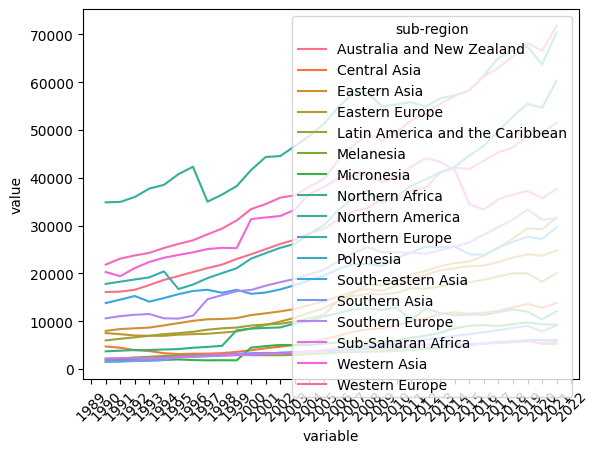

In [27]:
sns.lineplot(data=df_gdppcap_subregion.melt(id_vars=['sub-region']), 
             x='variable', y='value', hue='sub-region')
plt.xticks(rotation=45)

#No extra text as output
None

#Also helps a bit
#plt.ioff()